In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns # for data visualization
import pickle
import statistics
import statsmodels.api as sm # linear regression
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest #proportion z score test
import pingouin as pg
from scipy.special import logit, expit
from scipy.stats import chi2_contingency

In [2]:
perfectionism_rawdata = pd.read_excel('perfectionism_rawdata.xlsx',sheet_name='remove missing data')
print(perfectionism_rawdata.columns)


Index(['subject', 'age', 'race', 'race_other', 'gender', 'gender_other',
       'year in college', 'PS_1', 'PS_2', 'PS_3', '7-PS_3+1', 'PS_4',
       '7-PS_4+1', 'PS_5', 'PS_6', 'PS_7', 'PS_8', 'PS_9', 'PS_10', 'PS_11',
       'PS_12', '7-PS_12+1', 'PS_13', '7-PS_13+1', 'PS_14', 'PS_15',
       'score of scale', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6',
       'log_exponent_fit', 'm', 'pred_satis_effort1', 'pred_satis_effort2',
       'pred_satis_effort3', 'pred_satis_effort4', 'pred_satis_effort5',
       'pred_satis_effort6'],
      dtype='object')


# demographics

## sample size

In [7]:
# number of subjects
len(perfectionism_rawdata)

374

## age

In [47]:
import re

def age_to_number(age_input: str) -> float:
    # Convert input to string if it's not already
    if not isinstance(age_input, str):
        age_input = str(age_input)

    # Extract numbers using regex
    numbers = re.findall(r'(\d+)', age_input)
    
    # Convert extracted numbers to float
    numbers = [float(num) for num in numbers]

    # Check if we have a year and month, or just a year
    if len(numbers) == 2:
        years, months = numbers
    elif len(numbers) == 1:
        years, months = numbers[0], 0
    else:
        raise ValueError("Invalid age format.")
    
    # Convert the age to a decimal number
    total_age = years + (months / 12)
    
    return total_age

In [33]:
text_input = "19"
print(age_to_number(text_input))

19.0


In [35]:
text_input = perfectionism_rawdata['age'][0]
print(age_to_number(text_input))

19.166666666666668


In [34]:
text_input = "19 yrs/2 months"
print(age_to_number(text_input))

19.166666666666668


In [37]:
text_input = "19yrs/2 months"
print(age_to_number(text_input))

19.166666666666668


In [49]:
# age
age = np.empty(len(perfectionism_rawdata))
for isub in range(len(perfectionism_rawdata)):
    #print(isub)
    age[isub]=age_to_number(perfectionism_rawdata['age'][isub])


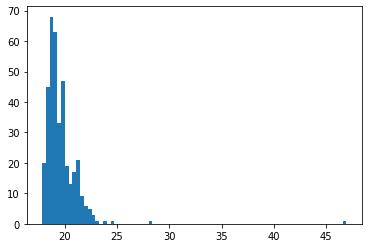

In [56]:
plt.hist(age,bins=80)
plt.show()

In [58]:
np.mean(age)

19.654188948306594

In [59]:
np.std(age)

1.8672404051934373

## gender

114 male, 255 female, 4 non-binary, 1 did not report  

In [60]:
len(perfectionism_rawdata[perfectionism_rawdata['gender']==1])

114

In [61]:
len(perfectionism_rawdata[perfectionism_rawdata['gender']==2])

255

In [62]:
len(perfectionism_rawdata[perfectionism_rawdata['gender']==3])

4

In [64]:
114+255+4+1

374

## year in college

208 freshmen, 109 Sophomores, 47 juniors and 10 seniors 

In [65]:
len(perfectionism_rawdata[perfectionism_rawdata['year in college']==1])

208

In [66]:
len(perfectionism_rawdata[perfectionism_rawdata['year in college']==2])

109

In [67]:
len(perfectionism_rawdata[perfectionism_rawdata['year in college']==3])

47

In [68]:
len(perfectionism_rawdata[perfectionism_rawdata['year in college']==4])

10

# model fitting

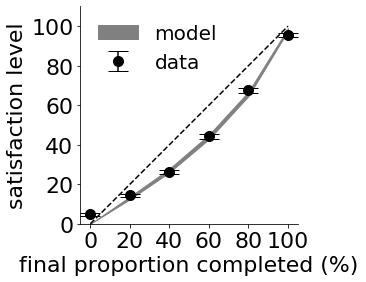

In [3]:
data=perfectionism_rawdata
data_meanvalue = [np.mean(data['satisfaction_1']), np.mean(data['satisfaction_2']), np.mean(data['satisfaction_3']),np.mean(data['satisfaction_4']),np.mean(data['satisfaction_5']),np.mean(data['satisfaction_6'])]
data_SEM = [stats.sem(data['satisfaction_1'],nan_policy='omit'),stats.sem(data['satisfaction_2'],nan_policy='omit'),stats.sem(data['satisfaction_3'],nan_policy='omit'),stats.sem(data['satisfaction_4'],nan_policy='omit'),stats.sem(data['satisfaction_5'],nan_policy='omit'),stats.sem(data['satisfaction_6'],nan_policy='omit')]

model_meanvalue = [np.mean(data['pred_satis_effort1']), np.mean(data['pred_satis_effort2']), np.mean(data['pred_satis_effort3']),np.mean(data['pred_satis_effort4']),np.mean(data['pred_satis_effort5']),np.mean(data['pred_satis_effort6'])]
model_SEM = [stats.sem(data['pred_satis_effort1'],nan_policy='omit'),stats.sem(data['pred_satis_effort2'],nan_policy='omit'),stats.sem(data['pred_satis_effort3'],nan_policy='omit'),stats.sem(data['pred_satis_effort4'],nan_policy='omit'),stats.sem(data['pred_satis_effort5'],nan_policy='omit'),stats.sem(data['pred_satis_effort6'],nan_policy='omit')]

fig, ax = plt.subplots()

x_pos = [0,20,40,60,80,100]
#x_posoff = [1+offset,2+offset,3+offset,4+offset,5+offset,6+offset,7+offset]

ax.errorbar(x_pos,data_meanvalue,data_SEM,capsize = 10,linestyle='none',marker='o',ms=10, label='data',color='k')#,color='#bdd7e7')
ax.fill_between(x_pos,np.array(model_meanvalue)-np.array(model_SEM),np.array(model_meanvalue)+np.array(model_SEM),label='model',color='grey')#,color='#fdbe85')
ax.plot([0,100],[0,100],'k--')

fontsizeN =22;
#ax.set_title('complete on the last day',fontsize=fontsizeN)

ax.legend(fontsize=20,frameon=False)

ax.set_xticks(x_pos)
ax.set_xticklabels(['0','20','40','60','80','100'],fontsize=fontsizeN)
ax.set_yticks(x_pos)
ax.set_yticklabels(['0','20','40','60','80','100'],fontsize=fontsizeN)
ax.tick_params(axis='y', labelsize=fontsizeN)
ax.set_xlabel('final proportion completed (%)',fontsize=fontsizeN)
ax.set_ylabel('satisfaction level',fontsize=fontsizeN)
ax.set_ylim([0,110])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect('equal', 'box')
fig.set_figheight(4)
fig.set_figwidth(4)
plt.savefig('satisfactionlevel_modelfit.pdf', format='pdf')

# histogram of exponent

In [7]:
np.mean(perfectionism_rawdata['log_exponent_fit'])

0.48590825746319505

In [4]:
stats.sem(perfectionism_rawdata['log_exponent_fit'],nan_policy='omit')

0.043150080202984206

In [9]:
np.mean(np.exp(perfectionism_rawdata['log_exponent_fit']))

2.7259965653967844

In [11]:
stats.sem(np.exp(perfectionism_rawdata['log_exponent_fit']),nan_policy='omit')

0.26893346397155765

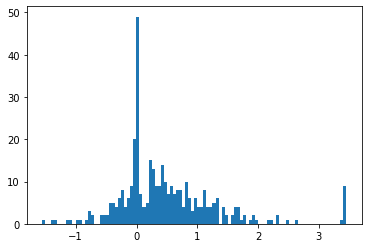

In [15]:
plt.hist(perfectionism_rawdata['log_exponent_fit'],bins=100)
plt.show()

# correlation

In [101]:
perfectionism_rawdata.loc[:,['log_exponent_fit','score of scale']].rcorr(stars=False, decimals=5)


,log_exponent_fit,score of scale
log_exponent_fit,-,0.00003
score of scale,0.21568,-


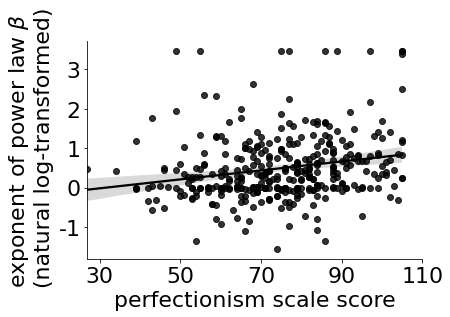

In [5]:
fig, ax = plt.subplots()
fontsizeN = 22 # for ticklables
sns.regplot(ax=ax,x="score of scale", y="log_exponent_fit", data=perfectionism_rawdata, color='k');
ax.set_xlabel('perfectionism scale score',fontsize=22)
ax.set_ylabel(r'exponent of power law $\beta$'+'\n (natural log-transformed)',fontsize=22)
ax.set_yticks([-1,0,1,2,3])
ax.set_yticklabels(['-1','0','1','2','3'],fontsize=fontsizeN)
ax.set_xticks([30,50,70,90,110])
ax.set_xticklabels(['30','50','70','90','110'],fontsize=fontsizeN)
#ax[0].text(-8,90,'r=0.282',fontsize=14)
#ax[0].text(-8,82,'p=0.009',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("perfectionism correlation.pdf", transparent=True)
plt.show()

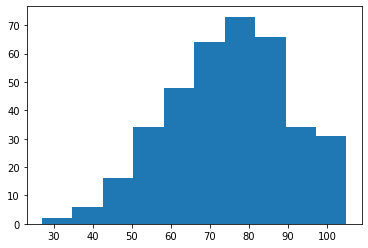

In [116]:
plt.hist(perfectionism_rawdata['score of scale'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


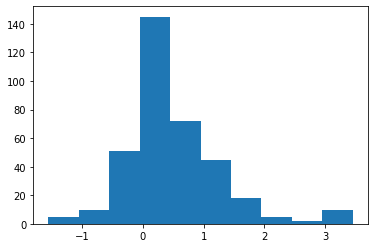

In [117]:
plt.hist(perfectionism_rawdata['log_exponent_fit'])
plt.show()

# combined figure for paper

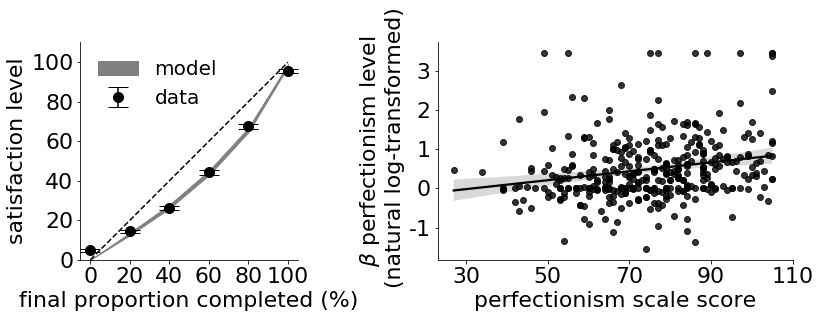

In [8]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
fontsizeN = 22 # for ticklables

x_pos = [0,20,40,60,80,100]
#x_posoff = [1+offset,2+offset,3+offset,4+offset,5+offset,6+offset,7+offset]

ax[0].errorbar(x_pos,data_meanvalue,data_SEM,capsize = 10,linestyle='none',marker='o',ms=10, label='data',color='k')#,color='#bdd7e7')
ax[0].fill_between(x_pos,np.array(model_meanvalue)-np.array(model_SEM),np.array(model_meanvalue)+np.array(model_SEM),label='model',color='grey')#,color='#fdbe85')
ax[0].plot([0,100],[0,100],'k--')


ax[0].legend(fontsize=20,frameon=False)

ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(['0','20','40','60','80','100'],fontsize=fontsizeN)
ax[0].set_yticks(x_pos)
ax[0].set_yticklabels(['0','20','40','60','80','100'],fontsize=fontsizeN)
ax[0].tick_params(axis='y', labelsize=fontsizeN)
ax[0].set_xlabel('final proportion completed (%)',fontsize=fontsizeN)
ax[0].set_ylabel('satisfaction level',fontsize=fontsizeN)
ax[0].set_ylim([0,110])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_aspect('equal', 'box')



sns.regplot(ax=ax[1],x="score of scale", y="log_exponent_fit", data=perfectionism_rawdata, color='k');
ax[1].set_xlabel('perfectionism scale score',fontsize=22)
ax[1].set_ylabel(r'$\beta$ perfectionism level'+'\n (natural log-transformed)',fontsize=22)
ax[1].set_yticks([-1,0,1,2,3])
ax[1].set_yticklabels(['-1','0','1','2','3'],fontsize=fontsizeN)
ax[1].set_xticks([30,50,70,90,110])
ax[1].set_xticklabels(['30','50','70','90','110'],fontsize=fontsizeN)
#ax[0].text(-8,90,'r=0.282',fontsize=14)
#ax[0].text(-8,82,'p=0.009',fontsize=14)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.savefig("empirical_perfectionism.pdf", transparent=True)
plt.show()